<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Familiarize yourself with the dataset 

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Description of the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
boston_df['Unnamed: 0']

0        0
1        1
2        2
3        3
4        4
      ... 
501    501
502    502
503    503
504    504
505    505
Name: Unnamed: 0, Length: 506, dtype: int64

We immediately see that we have an additional column called "Unnamed: 0". This column is exactly equivalent to the index and it is automatically generated when you use the .reset_index() pandas function. Since we already have the index, we can get rid of this column 

In [13]:
boston_df = boston_df.drop(columns=['Unnamed: 0'])

Check for categorical variables

In [39]:
pd.DataFrame({
    'CRIM': [boston_df['CRIM'].nunique()],
    'ZN'  : [boston_df['ZN'].nunique()],
    'INDUS'  : [boston_df['INDUS'].nunique()],
    'CHAS'  : [boston_df['CHAS'].nunique()],
    'NOX'  : [boston_df['NOX'].nunique()],
    'RM'  : [boston_df['RM'].nunique()],
    'AGE'  : [boston_df['AGE'].nunique()],
    'DIS'  : [boston_df['DIS'].nunique()],
    'RAD'  : [boston_df['RAD'].nunique()],
    'TAX'  : [boston_df['TAX'].nunique()],
    'PTRATIO'  : [boston_df['PTRATIO'].nunique()],
    'LSTAT'  : [boston_df['LSTAT'].nunique()],
    'MEDV'  : [boston_df['MEDV'].nunique()],
    
})

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,504,26,76,2,81,446,356,412,9,66,46,455,229


As it is specified in the description, CHAS is a categorical variable assuming values 0 or 1. The variable RAD assumes 9 distinct values out of 505, so it might be thought as categorical. 

### Task 2: Generate basic statistics and visualizations for upper management. 

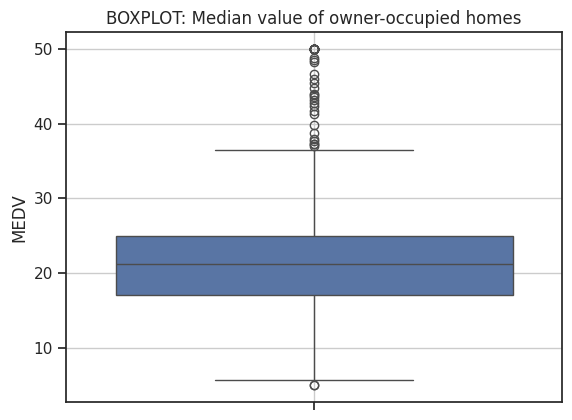

In [108]:
sns.set(style="ticks")
ax = sns.boxplot(y='MEDV', data=boston_df)
ax = ax.set_title('BOXPLOT: Median value of owner-occupied homes')
pyplot.grid()

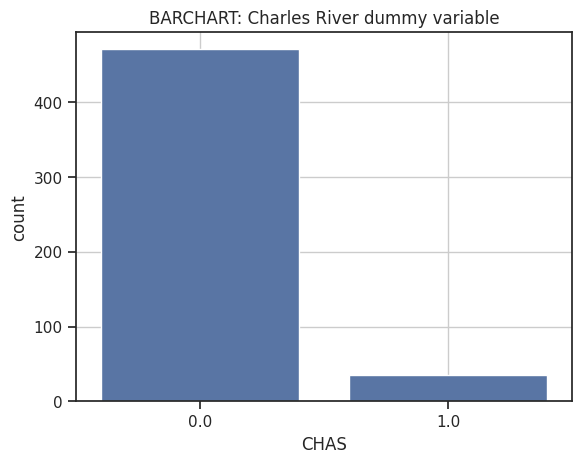

In [107]:
sns.set(style="ticks")
ax = sns.countplot(x='CHAS', data=boston_df)
ax = ax.set_title('BARCHART: Charles River dummy variable')
pyplot.grid()

In [70]:
boston_df['AGE_GROUP'] = ''
boston_df['AGE_GROUP'].loc[ boston_df['AGE'] <= 35 ] = '35 years and younger'
boston_df['AGE_GROUP'].loc[ ( boston_df['AGE'] > 35 ) & ( boston_df['AGE'] < 70 ) ] = 'Between 35 and 70'
boston_df['AGE_GROUP'].loc[ boston_df['AGE'] >= 70 ] = '70 years and older'

<ipython-input-70-816ca766366e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['AGE_GROUP'].loc[ boston_df['AGE'] <= 35 ] = '35 years and younger'
<ipython-input-70-816ca766366e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['AGE_GROUP'].loc[ ( boston_df['AGE'] > 35 ) & ( boston_df['AGE'] < 70 ) ] = 'Between 35 and 70'
<ipython-input-70-816ca766366e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['A

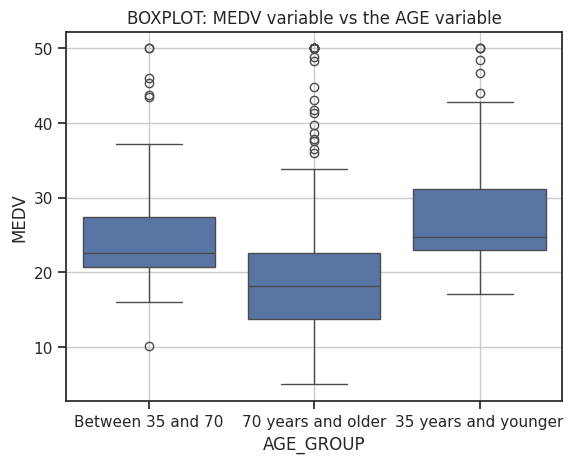

In [106]:
sns.set(style="ticks")
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
ax = ax.set_title('BOXPLOT: MEDV variable vs the AGE variable')
pyplot.grid()

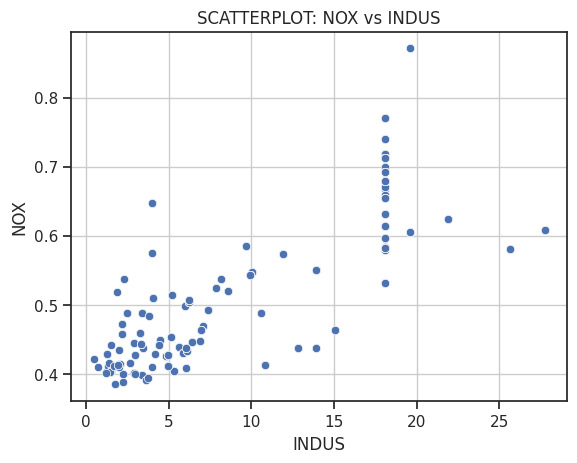

In [105]:
sns.set(style="ticks")
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax = ax.set_title('SCATTERPLOT: NOX vs INDUS')
pyplot.grid()

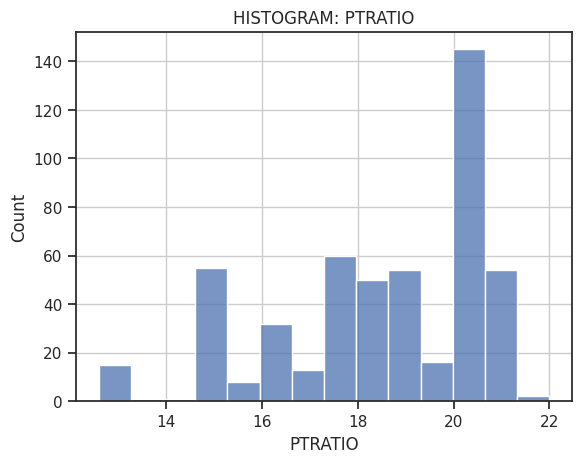

In [116]:
sns.set(style="ticks")
ax = sns.histplot(data=boston_df, x="PTRATIO")
ax = ax.set_title('HISTOGRAM: PTRATIO')
pyplot.grid()

We can guess a linear relationship between NOX and INDUSE, in particular it looks like the two variables are postively correlated

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not?

Let's first have a look at the means of the median value of houses bounded by the Charles river or not:

In [122]:
print(f"Bounded by the Charles river: {boston_df.loc[ boston_df['CHAS'] == 1.0 ]['MEDV'].mean()}")
print(f"Not bounded by the Charles river: {boston_df.loc[ boston_df['CHAS'] == 0.0 ]['MEDV'].mean()}")

Bounded by the Charles river: 28.439999999999998
Not bounded by the Charles river: 22.093842887473464


Let's then conduct a T-test. First we state our hypothesis:

NULL HYPOTHESIS: mu_bounded == mu_not_bounded There is no significant statistical difference between means of the median values of houses bounded by the Charles river and not bounded bounded by the Charles

ALTERNATIVE HYPOTHESIS: mu_bounded != mu_not_bounded There is significant statistical difference between the means of the median values of houses bounded by the Charles river and not bounded bounded by the Charles

We set our significance level alpha to 0.05

Let's first conduct a Levene test to check for equality of variances. 

NULL HYPOTHESIS: var_bounded == var_not_bounded There is no significant statistical difference between the variances of the  median values of houses bounded by the Charles river and not bounded bounded by the Charles

ALTERNATIVE HYPOTHESIS: var_bounded != var_not_bounded There is significant statistical difference between the variances of the median values of houses bounded by the Charles river and not bounded bounded by the Charles

We set our alpha to 0.05:

In [126]:
scipy.stats.levene(boston_df.loc[ boston_df['CHAS'] == 1.0 ]['MEDV'],
                      boston_df.loc[ boston_df['CHAS'] == 0.0 ]['MEDV']
                   )

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

The P-value is lower then 0.05 so we reject the null hypothesis that support equal variances, and we conclude that there is enough evidence to support a statistical difference between the variances of the median values of houses bounded by the Charles river and not bounded bounded by the Charles

Let's then perform the T-test by setting the equalvar parameter to False, according to the Leven test just performed:

In [128]:
scipy.stats.ttest_ind(boston_df.loc[ boston_df['CHAS'] == 1.0 ]['MEDV'],
                      boston_df.loc[ boston_df['CHAS'] == 0.0 ]['MEDV'],
                      equal_var=False
                     )

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

The P-value is lower then 0.05 so we reject the null hypothesis that support equal means, and we conclude that there is enough evidence to support a statistical difference between the means of the median values of houses bounded by the Charles river and not bounded bounded by the Charles

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Let's first have a look at the means of the median value of owner-occupied homes in $1000's by age:

In [134]:
print(f"35 years and younger: {boston_df.loc[ boston_df['AGE_GROUP'] == '35 years and younger' ]['MEDV'].mean()}")
print(f"Between 35 and 70: {boston_df.loc[ boston_df['AGE_GROUP'] == 'Between 35 and 70' ]['MEDV'].mean()}")
print(f"70 years and older: {boston_df.loc[ boston_df['AGE_GROUP'] == '70 years and older' ]['MEDV'].mean()}")

35 years and younger: 27.77582417582417
Between 35 and 70: 24.94765625
70 years and older: 19.793379790940765


Let's then conduct an ANOVA. First we state our hypothesis:

NULL HYPOTHESIS: mu_35_and_younger == mu_between_35_and_70 == mu_70_and_older There is no significant statistical difference between means of the median value of owner-occupied homes for the different age groups

ALTERNATIVE HYPOTHESIS: mu_35_and_younger != mu_between_35_and_70 != mu_70_and_older There is significant statistical difference between the means of the median value of owner-occupied homes for at least one age group

We set our significance level alpha to 0.05

In [133]:
scipy.stats.f_oneway(boston_df.loc[ boston_df['AGE_GROUP'] == '35 years and younger' ]['MEDV'],
                     boston_df.loc[ boston_df['AGE_GROUP'] == 'Between 35 and 70' ]['MEDV'],
                     boston_df.loc[ boston_df['AGE_GROUP'] == '70 years and older' ]['MEDV'],
                    )

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

The P-value is lower then 0.05 so we reject the null hypothesis that support equal means, and we conclude that there is enough evidence to support statistical difference between the means of the median value of owner-occupied homes

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

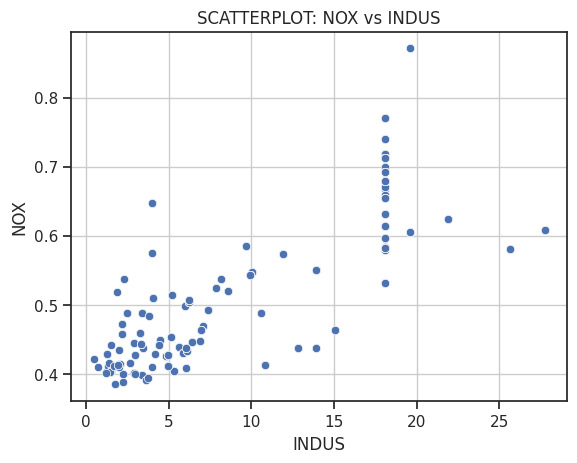

In [135]:
sns.set(style="ticks")
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax = ax.set_title('SCATTERPLOT: NOX vs INDUS')
pyplot.grid()

Despite from the plot we can guess a positive correlation between NOX and INDUS, let's state hypothesis:

NULL HYPOTHESIS: there is no correlation between NOX and INDUS

ALTERNATIVE HYPOTHESIS: there is correlation between NOX and INDUS

We set our alpha to 0.05:

Let's conduct a Pearson Correlation Test

In [136]:
scipy.stats.pearsonr(boston_df['NOX'],
                     boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The P-value is lower then 0.05 so we reject the null hypothesis that no correlation, and we conclude that there is enough evidence to support statistical correlation between theNOX and INDUS. In particular we see a correlation coefficient of 0.764 which implies a strong positive linear relation between the two variables

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

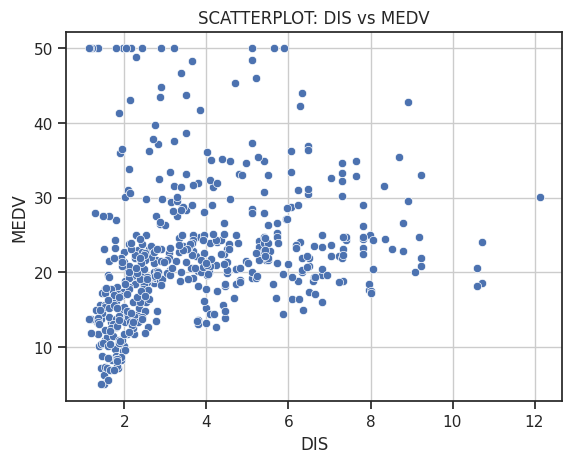

In [139]:
sns.set(style="ticks")
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
ax = ax.set_title('SCATTERPLOT: DIS vs MEDV')
pyplot.grid()

Despite from the plot we can guess a positive correlation between MEDV and DIS, let's state hypothesis:

NULL HYPOTHESIS: there is no correlation between MEDV and DIS

ALTERNATIVE HYPOTHESIS: there is correlation between MEDV and DIS

We set our alpha to 0.05:

Let's perform regression:

In [140]:
X = boston_df['DIS']

In [141]:
y = boston_df['MEDV']

In [142]:
X = sm.add_constant(X)

In [143]:
model = sm.OLS(y, X).fit()

In [144]:
predictions = model.predict(X)

In [146]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        11:14:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Prob (F-statistic) is lower then 0.05 so we reject the null hypothesis that no correlation, and we conclude that there is enough evidence to support statistical correlation between the MEDV and DIS. In particular we see a R-squared of 0.062, which implies a correlation coefficient of 0.25, which in turn implies a positive linear correlation